# Haberman's Survival: Exploratory Data Analysis



In [12]:
# importing neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [13]:
warnings.filterwarnings('ignore')

In [14]:
# importing the cancer survival dataset into notebook
# the columns names are not provided in the dataset, so applying the column names in the order of the column

cancer = pd.read_csv('../input/habermans-survival-data-set/haberman.csv', names=['Age', 'Operation_year', 'Axil_Nodes', 'Survival_Status'])

In [15]:
# general info about the dataset

cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              306 non-null    int64
 1   Operation_year   306 non-null    int64
 2   Axil_Nodes       306 non-null    int64
 3   Survival_Status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [16]:
# top 5 data points of the dataset

cancer.head(5)

,Age,Operation_year,Axil_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## **Observation**

The dataset contains 4 rows and 306 columns, regarding the people who have cancer.
It contains following columns:-
1. Age of the affected people
2. Patient's year of operation (between 1958 - 1970)
3. Number of axillary nodes detected
4. Patient survived after 5 years or not.

In [17]:
# Modifying the Target variable into more meaningful categorical column

cancer['Survival_Status'] = list(map(lambda x : 'no' if (x is 2) else 'yes', cancer['Survival_Status']))

In [18]:
cancer['Survival_Status']

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
301    yes
302    yes
303    yes
304     no
305     no
Name: Survival_Status, Length: 306, dtype: object

In [19]:
cancer['Survival_Status'].value_counts()


# survival_status column is imbalanced by 225:81
# 225 survived after 5 years
# 81 died within 5 years

yes    225
no      81
Name: Survival_Status, dtype: int64

In [20]:
# Statistical data of the dataset

cancer.describe()


,Age,Operation_year,Axil_Nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


## **Observation**
    
1. Patients are from the min. age of 30 to max. age of 83, averaging about 52 years.
2. axillary nodes are ranging from 0 to 52, averaging at 4 nodes.
3. axillary nodes detected are greater in 75%-max as compared to 0-75%.


<h2>Objective</h2>
we are trying to predict the survival status of the patients diagnosed with cancer.
<br>
we have 3 feature variables:
<li> Age of patient at the time of operation
<li> Patient's year of operation
<li> Number of positie axillary nodes detected

and a target variable:
<li>Survival Status of the patient after 5 years
<br>yes = Patient survived longer than 5 years
<br>no = Patient died within 5 years


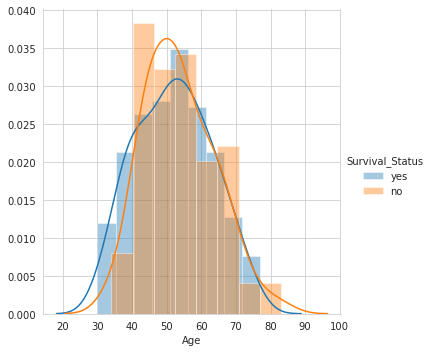

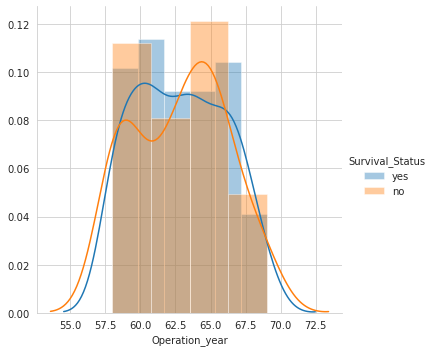

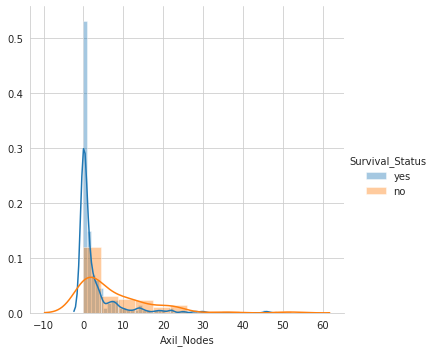

In [21]:
# Univariate analysis with Age, Operation year and positive axil nodes detected

for idx, feature in enumerate(list(cancer.columns)[:-1]):
    sns.set_style('whitegrid')
    c = sns.FacetGrid(data=cancer, hue='Survival_Status', size=5)
    c.map(sns.distplot, feature)
    c.add_legend()



########## Age ##########
Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF: [0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
CDF: [0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]

########## Operation_year ##########
Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF: [0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
CDF: [0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]

########## Axil_Nodes ##########
Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF: [0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
CDF: [0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1

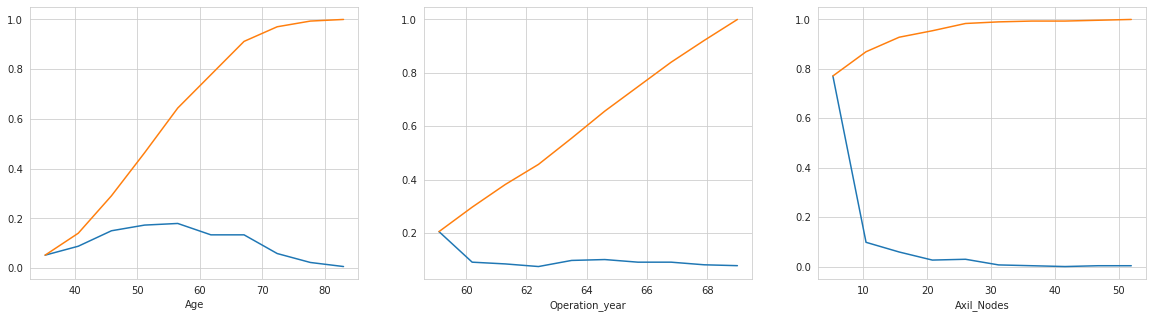

In [22]:
# Distribution Plots are effective in visually assessing the datapoints
# PDF (Probability Density Function) is created by smoothing histogram values
# CDF (Cummulative Density Function) is the odds of measuring any value upto and including x

plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(cancer.columns)[:-1]):
    plt.subplot(1,3,idx+1)
    print(f'\n########## {feature} ##########')
    count, bin_edges = np.histogram(cancer[feature], bins=10, density=True)
    print(f'Bin Edges: {bin_edges}')
    pdf = count/sum(count)
    print(f'PDF: {pdf}')
    cdf = np.cumsum(pdf)
    print(f'CDF: {cdf}')
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)

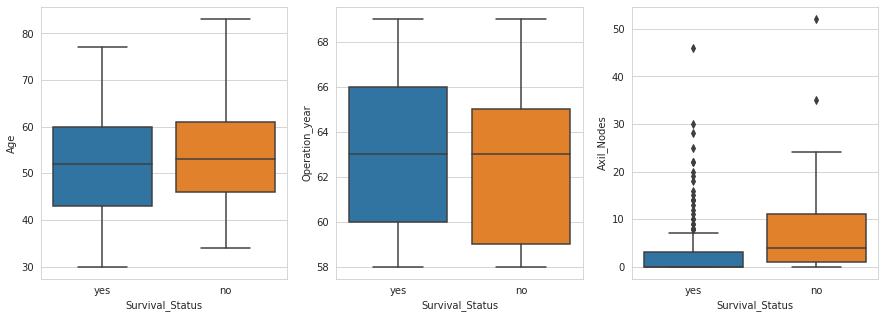

In [23]:
# Box-Plots

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(cancer.columns)[:-1]):
    sns.set_style('whitegrid')
    sns.boxplot(x='Survival_Status', y=feature, data=cancer, ax=axes[idx])

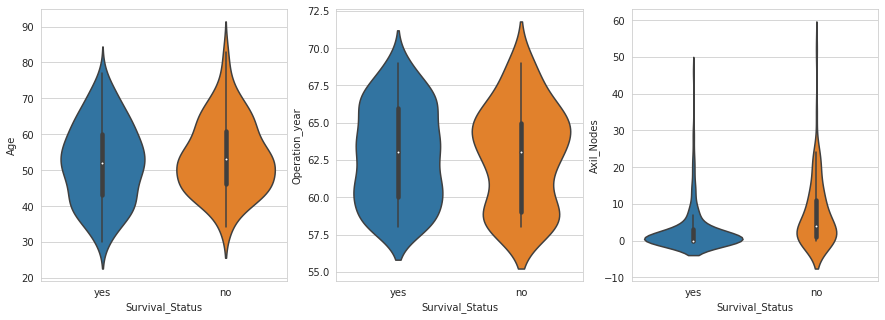

In [24]:
# Violin-Plots

fig, axes = plt.subplots(1, 3, figsize=(15,5))
for idx, feature in enumerate(list(cancer.columns)[:-1]):
    sns.set_style('whitegrid')
    sns.violinplot(x='Survival_Status', y=feature, data=cancer, ax=axes[idx])

In [25]:
# Percentage of patients with axillary nodes less than or equal to 10 and survived

anp = int(cancer[(cancer['Axil_Nodes'] <= 10) & (cancer['Survival_Status'] == 'yes')].count().unique())
p = anp/len(cancer['Axil_Nodes'])*100
print(p)

67.97385620915033


In [26]:
# Percentage of patients with axillary nodes greater than 10 and survived

anp = int(cancer[(cancer['Axil_Nodes'] > 10) & (cancer['Survival_Status'] == 'yes')].count().unique())
p = anp/len(cancer['Axil_Nodes'])*100
print(p)

5.555555555555555


In [27]:
# Percentage of patients with axillary nodes less than or equal to 10 and could not survive

anp = int(cancer[(cancer['Axil_Nodes'] <= 10) & (cancer['Survival_Status'] == 'no')].count().unique())
p = anp/len(cancer['Axil_Nodes'])*100
print(p)

18.954248366013072


In [28]:
# Percentage of patients with axillary nodes greater than 10 and could not survive

anp = int(cancer[(cancer['Axil_Nodes'] > 10) & (cancer['Survival_Status'] == 'no')].count().unique())
p = anp/len(cancer['Axil_Nodes'])*100
print(p)

7.516339869281046


In [29]:
# Percentage of patients with ages between 40-60 and survived

sp = int(cancer[(cancer['Age'] > 40) & (cancer['Age'] < 60) & (cancer['Survival_Status'] == 'yes')].count().unique())
# print(f'Patient survived between age 40-60 : {sp}')
abc = (sp/len(cancer['Age']))*100
print(abc)

41.50326797385621


In [30]:
# Percentage of patients with ages between 40-60 and could not survive

sp = int(cancer[(cancer['Age'] > 40) & (cancer['Age'] < 60) & (cancer['Survival_Status'] == 'no')].count().unique())
# print(f'Patient survived between age 40-60 : {sp}')
abc = (sp/len(cancer['Age']))*100
print(abc)

17.320261437908496


## **Observation**

1. Most of the patients affected are in the age between 40-60.
2. Years 1963-1966 had more affected cases.
3. Almost 19% patients had axillary node less than 10 but could not survive longer than 5 years



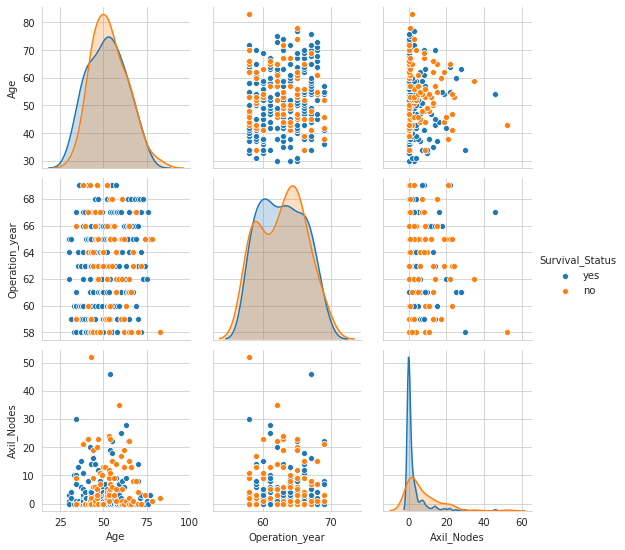

In [31]:
# Bivariate Analysis
# Pairplot reveals pair-wise relationship across entire dataset

sns.pairplot(data=cancer, hue='Survival_Status')

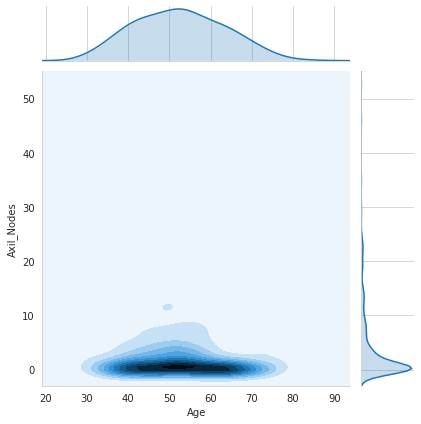

In [32]:
sns.jointplot(x='Age', y='Axil_Nodes', data=cancer, kind='kde')

## **Conclusion**

1. Feature column <b>Age</b> and <b>Axil_nodes_detected</b> are much better for predicting the survival of the patients.
2. Number of deaths were more in the age between 40-60
3. Patients with axillary nodes detected < 10 had less chances of surviving than the patients with higher number of axillary nodes detected

